Randomized Graph regularized Nonnegative Matrix Factorization
-------------------------------------------------------------

Optimization Problem: 

$$
\begin{array}{ll}
\mbox{minimize} & f(\tilde{W}, H) = \frac{1}{2} \| B - \tilde{U} V^T \|_F^2 + \lambda \mbox{Tr}(V^T L V) \\
\mbox{subject to} & Q\tilde{U} \geq 0_{M \times K},\  V \geq 0_{N \times K}
\end{array}
$$

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from randomized_gnmf.rgnmf import GNMF, RGNMF
from randomized_gnmf.metrics import calc_ac_score, calc_nmi_score
%matplotlib inline

Input [COIL20 dataset][coil]
----------------------------

[coil]: https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php

In [12]:
with open('./input/COIL20.pkl', 'rb') as f:
    COIL20 = pickle.load(f)

In [13]:
scaler = Normalizer()

X = COIL20['X']
X = scaler.fit_transform(X.T).T
y = COIL20['y']
k = len(np.unique(y))

In [14]:
kmeans = KMeans(n_clusters=k, random_state=0)
gnmf = GNMF(n_components=k, random_state=0, calc_objs=True, max_iter=200)
rgnmf = RGNMF(n_components=k, random_state=0, calc_objs=True, max_iter=200)

In [15]:
%%time
gnmf_labels = kmeans.fit(gnmf.fit(X).get_coef()).labels_

CPU times: user 11.6 s, sys: 570 ms, total: 12.2 s
Wall time: 2.84 s


In [16]:
%%time
rgnmf_labels = kmeans.fit(rgnmf.fit(X).get_coef()).labels_

CPU times: user 11.7 s, sys: 756 ms, total: 12.4 s
Wall time: 2.83 s


Results
-------

In [17]:
print('[GNMF]   AC: {0:.1f}%'.format(calc_ac_score(y, gnmf_labels) * 100))
print('[RGNMF]  AC: {0:.1f}%'.format(calc_ac_score(y, rgnmf_labels) * 100))

[GNMF]   AC: 78.5%
[RGNMF]  AC: 82.2%


In [18]:
print('[GNMF]   NMI: {0:.1f}%'.format(calc_nmi_score(y, gnmf_labels) * 100))
print('[RGNMF]  NMI: {0:.1f}%'.format(calc_nmi_score(y, rgnmf_labels) * 100))

[GNMF]   NMI: 89.6%
[RGNMF]  NMI: 89.0%


Objective function value
-------------------------

In [19]:
gnmf_objs = gnmf.get_objs()
rgnmf_objs = rgnmf.get_objs()

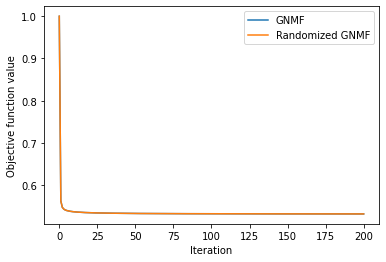

In [20]:
plt.plot(gnmf_objs, label='GNMF')
plt.plot(rgnmf_objs, label='Randomized GNMF')
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.legend()
plt.show()